## Importacion de Librerias

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Configura los gráficos para que se vean bien en el notebook
%matplotlib inline
sns.set(style="whitegrid")


## Funcion para explorar datos

In [6]:
data_files = [
    '../data/geo_data_0.csv',
    '../data/geo_data_1.csv',
    '../data/geo_data_2.csv'
]

region_names = ['Región 0', 'Región 1', 'Región 2']

In [7]:
def explorar_datos(df, region_name):
    print(f"\n===== Análisis exploratorio: {region_name} =====")
    print("\nPrimeras filas:")
    display(df.head())

    print("\nShape (filas, columnas):", df.shape)
    print("\nEstadísticas descriptivas:")
    display(df.describe())

    print("\nValores nulos por columna:")
    print(df.isnull().sum())

    print("\nDuplicados:", df.duplicated().sum())

    # Histograma de la variable objetivo
    print("\nDistribución de la variable objetivo 'product':")
    plt.figure(figsize=(6, 4))
    df['product'].hist(bins=20, color='skyblue', edgecolor='black')
    plt.title(f"Distribución de 'product' en {region_name}")
    plt.xlabel('product')
    plt.ylabel('Frecuencia')
    plt.show()

    # Histogramas de las características
    features = [col for col in df.columns if col.startswith('f')]
    for col in features:
        plt.figure(figsize=(6, 4))
        df[col].hist(bins=20, color='gold', edgecolor='black')
        plt.title(f"Distribución de '{col}' en {region_name}")
        plt.xlabel(col)
        plt.ylabel('Frecuencia')
        plt.show()

    # Boxplots para ver outliers en cada feature y el target
    for col in features + ['product']:
        plt.figure(figsize=(6, 2))
        sns.boxplot(x=df[col], color='lightgreen')
        plt.title(f"Boxplot de '{col}' en {region_name}")
        plt.show()

    # Matriz de correlación
    print("\nMatriz de correlación (solo columnas numéricas):")
    num_df = df.select_dtypes(include='number')
    corr = num_df.corr()
    display(corr)

    # Heatmap de correlación
    plt.figure(figsize=(6, 4))
    sns.heatmap(corr, annot=True, cmap='coolwarm')
    plt.title(f"Matriz de correlación en {region_name}")
    plt.show()

## Recorrer datasets para explorar datos


===== Análisis exploratorio: Región 0 =====

Primeras filas:


,id,f0,f1,f2,product
0,txEyH,0.705745,-0.497823,1.221170,105.280062
1,2acmU,1.334711,-0.340164,4.365080,73.037750
2,409Wp,1.022732,0.151990,1.419926,85.265647
3,iJLyR,-0.032172,0.139033,2.978566,168.620776
4,Xdl7t,1.988431,0.155413,4.751769,154.036647



Shape (filas, columnas): (100000, 5)

Estadísticas descriptivas:


,f0,f1,f2,product
count,100000.000000,100000.000000,100000.000000,100000.000000
mean,0.500419,0.250143,2.502647,92.500000
std,0.871832,0.504433,3.248248,44.288691
min,-1.408605,-0.848218,-12.088328,0.000000
25%,-0.072580,-0.200881,0.287748,56.497507
50%,0.502360,0.250252,2.515969,91.849972
75%,1.073581,0.700646,4.715088,128.564089
max,2.362331,1.343769,16.003790,185.364347



Valores nulos por columna:
id         0
f0         0
f1         0
f2         0
product    0
dtype: int64

Duplicados: 0

Distribución de la variable objetivo 'product':


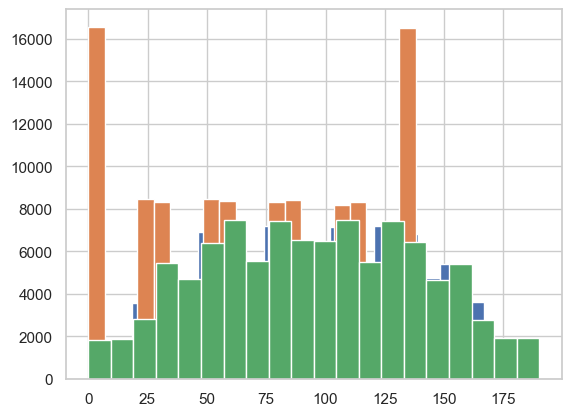

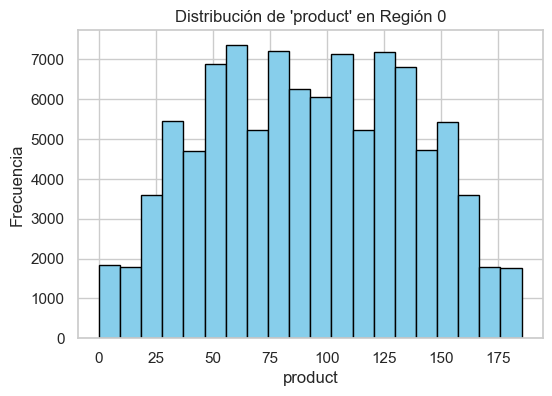

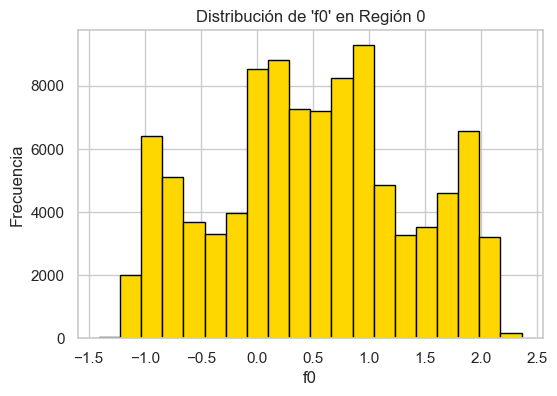

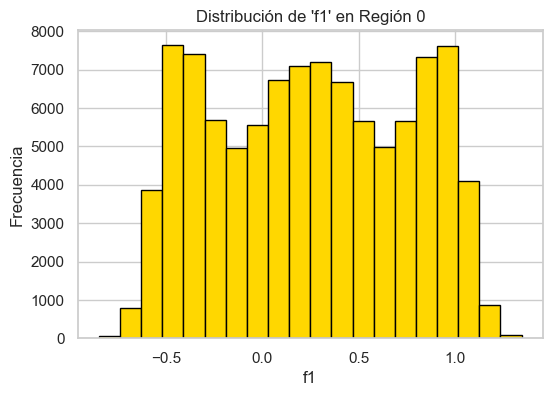

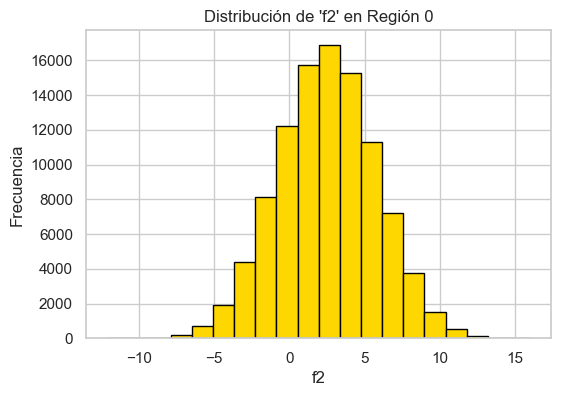

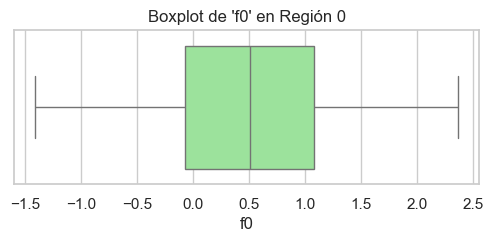

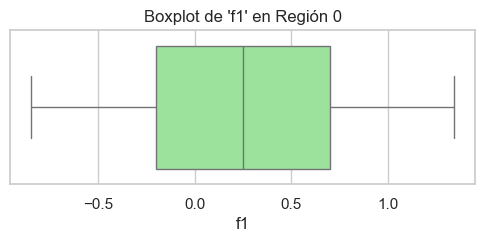

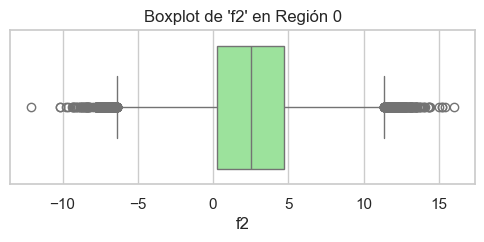

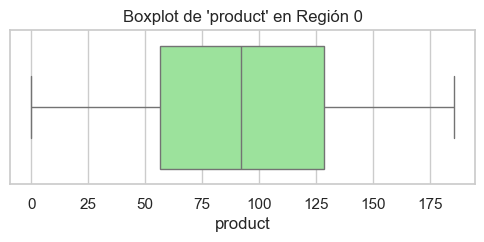


Matriz de correlación (solo columnas numéricas):


,f0,f1,f2,product
f0,1.000000,-0.440723,-0.003153,0.143536
f1,-0.440723,1.000000,0.001724,-0.192356
f2,-0.003153,0.001724,1.000000,0.483663
product,0.143536,-0.192356,0.483663,1.000000


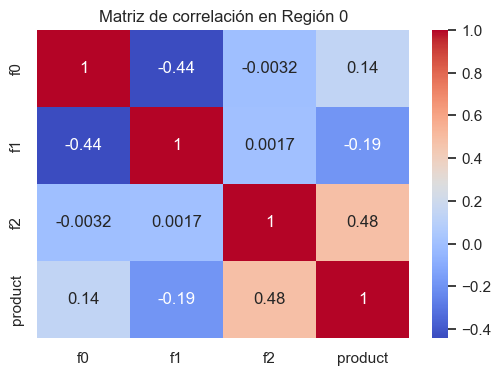


===== Análisis exploratorio: Región 1 =====

Primeras filas:


,id,f0,f1,f2,product
0,kBEdx,-15.001348,-8.276000,-0.005876,3.179103
1,62mP7,14.272088,-3.475083,0.999183,26.953261
2,vyE1P,6.263187,-5.948386,5.001160,134.766305
3,KcrkZ,-13.081196,-11.506057,4.999415,137.945408
4,AHL4O,12.702195,-8.147433,5.004363,134.766305



Shape (filas, columnas): (100000, 5)

Estadísticas descriptivas:


,f0,f1,f2,product
count,100000.000000,100000.000000,100000.000000,100000.000000
mean,1.141296,-4.796579,2.494541,68.825000
std,8.965932,5.119872,1.703572,45.944423
min,-31.609576,-26.358598,-0.018144,0.000000
25%,-6.298551,-8.267985,1.000021,26.953261
50%,1.153055,-4.813172,2.011479,57.085625
75%,8.621015,-1.332816,3.999904,107.813044
max,29.421755,18.734063,5.019721,137.945408



Valores nulos por columna:
id         0
f0         0
f1         0
f2         0
product    0
dtype: int64

Duplicados: 0

Distribución de la variable objetivo 'product':


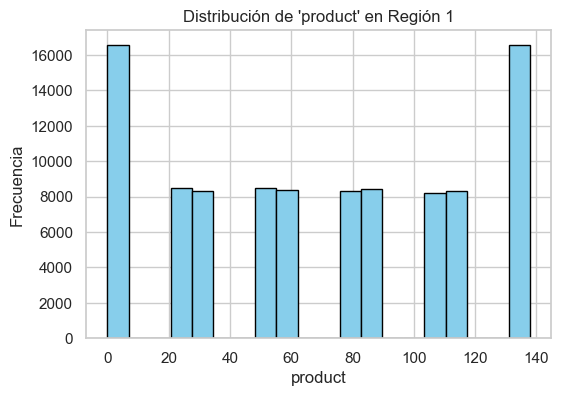

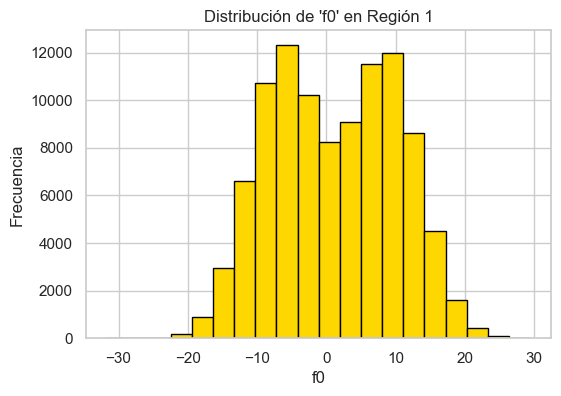

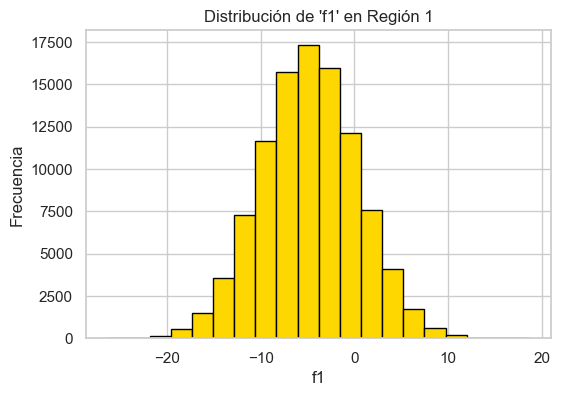

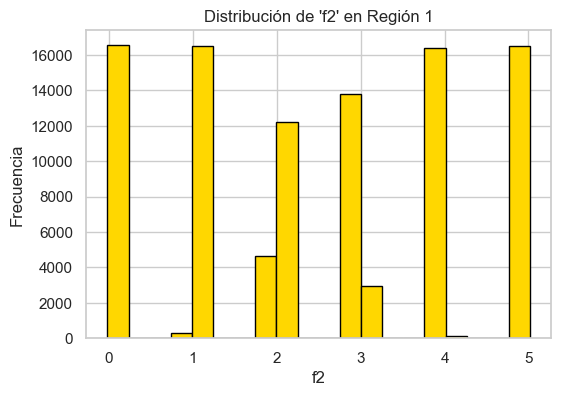

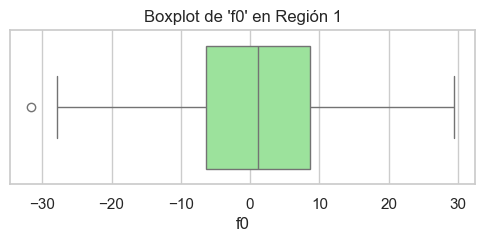

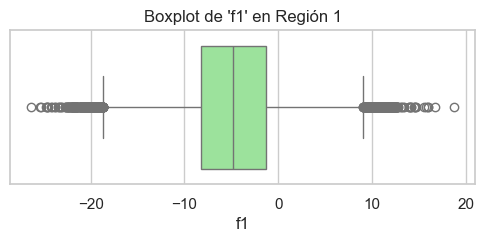

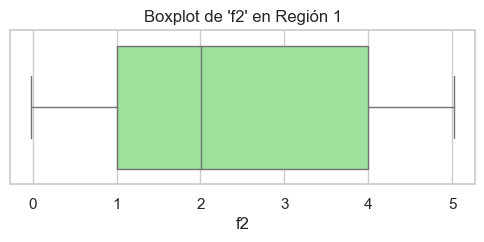

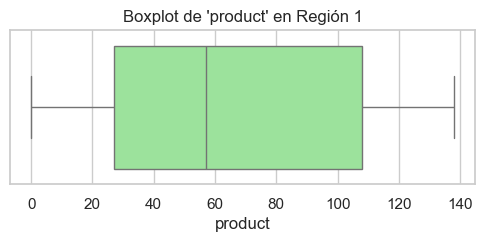


Matriz de correlación (solo columnas numéricas):


,f0,f1,f2,product
f0,1.000000,0.182287,-0.001777,-0.030491
f1,0.182287,1.000000,-0.002595,-0.010155
f2,-0.001777,-0.002595,1.000000,0.999397
product,-0.030491,-0.010155,0.999397,1.000000


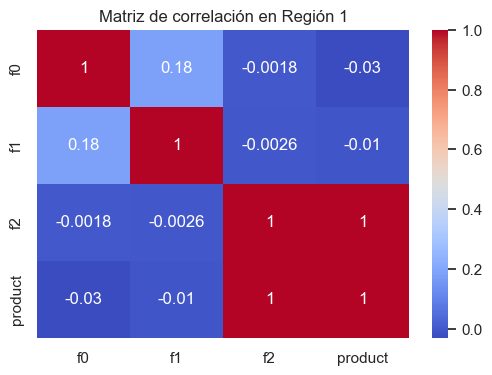


===== Análisis exploratorio: Región 2 =====

Primeras filas:


,id,f0,f1,f2,product
0,fwXo0,-1.146987,0.963328,-0.828965,27.758673
1,WJtFt,0.262778,0.269839,-2.530187,56.069697
2,ovLUW,0.194587,0.289035,-5.586433,62.871910
3,q6cA6,2.236060,-0.553760,0.930038,114.572842
4,WPMUX,-0.515993,1.716266,5.899011,149.600746



Shape (filas, columnas): (100000, 5)

Estadísticas descriptivas:


,f0,f1,f2,product
count,100000.000000,100000.000000,100000.000000,100000.000000
mean,0.002023,-0.002081,2.495128,95.000000
std,1.732045,1.730417,3.473445,44.749921
min,-8.760004,-7.084020,-11.970335,0.000000
25%,-1.162288,-1.174820,0.130359,59.450441
50%,0.009424,-0.009482,2.484236,94.925613
75%,1.158535,1.163678,4.858794,130.595027
max,7.238262,7.844801,16.739402,190.029838



Valores nulos por columna:
id         0
f0         0
f1         0
f2         0
product    0
dtype: int64

Duplicados: 0

Distribución de la variable objetivo 'product':


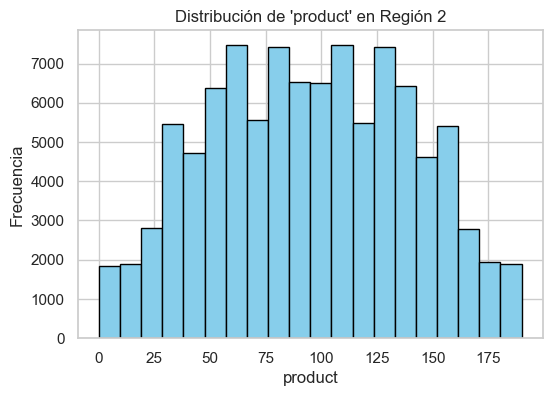

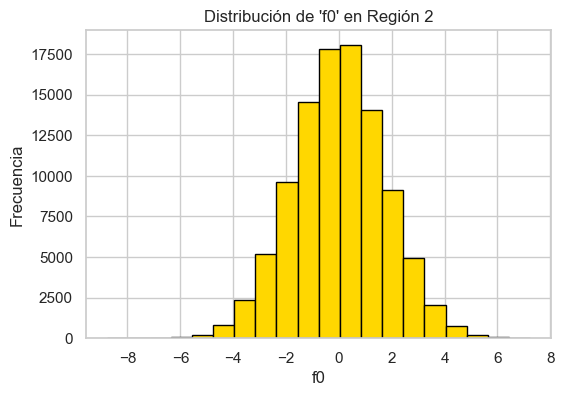

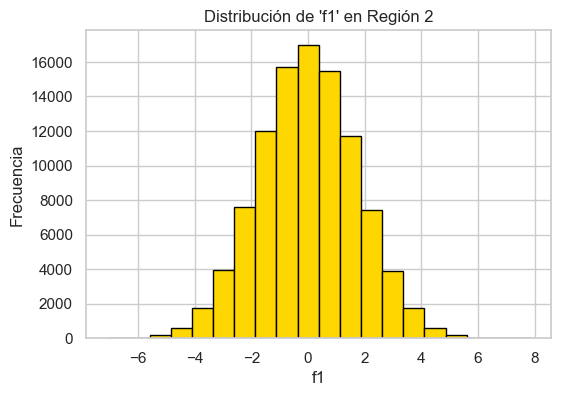

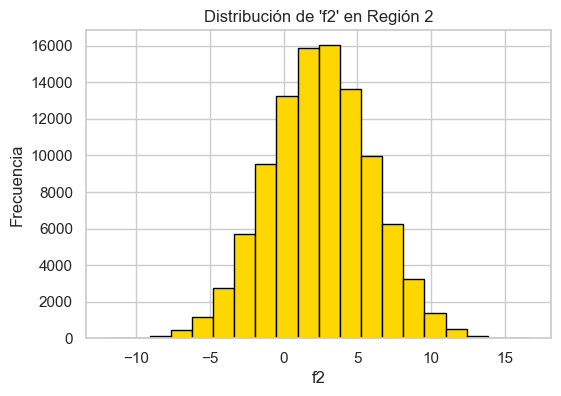

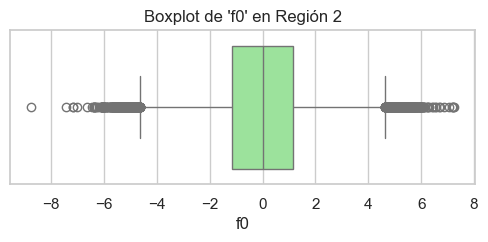

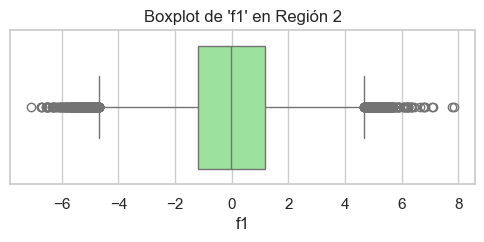

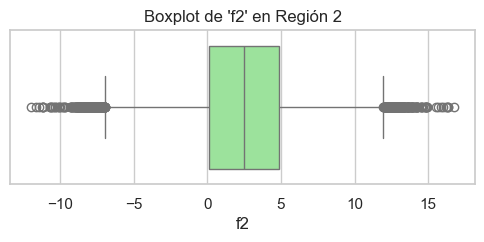

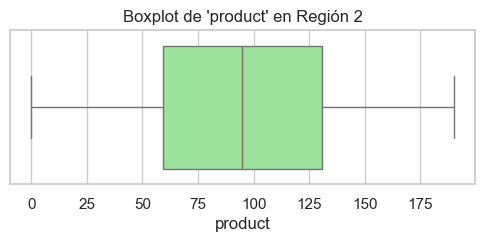


Matriz de correlación (solo columnas numéricas):


,f0,f1,f2,product
f0,1.000000,0.000528,-0.000448,-0.001987
f1,0.000528,1.000000,0.000779,-0.001012
f2,-0.000448,0.000779,1.000000,0.445871
product,-0.001987,-0.001012,0.445871,1.000000


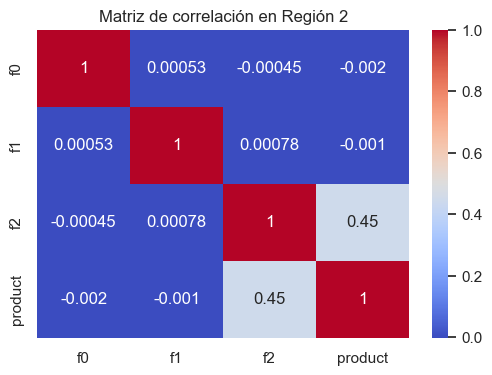

In [8]:
for file, name in zip(data_files, region_names):
    df = pd.read_csv(file)
    explorar_datos(df, name)

# Conclusiones

Tras analizar la distribución de product en cada región, se observa que las Regiones 0 y 2 presentan una distribución uniforme y adecuada para modelado. En cambio, la Región 1 tiene una distribución bimodal ('U'), lo cual indica mayor riesgo y posibles dificultades para predecir el volumen de reservas. No se identifican valores atípicos ni errores evidentes, por lo que no se realizaron transformaciones ni limpiezas adicionales antes del modelado.


### Interpretación de la matriz de correlación

- **Región 0 y Región 2:** La feature `f2` presenta una correlación moderada y positiva con la variable objetivo `product` (~0.45), lo que sugiere que aportará valor al modelo de regresión lineal. Las demás features tienen correlaciones bajas o nulas, por lo que su influencia será limitada.
- **Región 1:** Ninguna de las features muestra correlación significativa con el target (`product`). Esto indica que la regresión lineal tendrá baja capacidad predictiva en esta región y es probable que el modelo solo prediga cerca del promedio o tenga errores altos.
- Este análisis anticipa que el rendimiento de los modelos será mejor en las Regiones 0 y 2 comparado con la Región 1.


-----

# Entrenamiento y validación de modelos de regresión lineal

En este notebook se entrenan y validan modelos de regresión lineal para predecir el volumen de reservas de petróleo (`product`) en cada una de las tres regiones.

### Preprocesamiento previo al modelado

- Todas las variables predictoras (`f0`, `f1`, `f2`) y la variable objetivo (`product`) son numéricas.
- Se verificó la ausencia de valores nulos y datos atípicos importantes en la etapa de exploración.
- No es necesaria la codificación de variables ni la imputación de datos faltantes.
- La columna `id` es únicamente un identificador y no se utiliza como feature en el modelo.
- Se continúa directamente con la división de los datos y el entrenamiento del modelo de regresión lineal.
